<a href="https://colab.research.google.com/github/Noman-Nosher/Data-Science-Tasks/blob/main/Malware_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import numpy as np
import torch
import pandas as pd
import csv
import random

In [ ]:
#pytorch tabular
!pip install pytorch_tabular[all]

In [2]:
# path of training data and testing data

test_data = "/content/drive/MyDrive/Muiba_project/Test data.csv"
train_data = "/content/drive/MyDrive/Muiba_project/Training.csv"
# rough_data for insights
rough_data = train_data


In [3]:
print(f"file path of rough_data is {rough_data} with type {type(rough_data)}".format(rough_data,type(rough_data)))

file path of rough_data is /content/drive/MyDrive/Muiba_project/Training.csv with type <class 'str'>


In [17]:
# How we can get sample from population before converting it into a dataframe
print(f"file path of rough_data is {rough_data} with type {type(rough_data)}".format(rough_data,type(rough_data)))
population = sum(1 for line in open(rough_data)) - 1 #number of records in file (excludes header)
sample = 1000 #desired sample size
print("Population is",population)
print("Desired sample is ",sample)
skip = sorted(random.sample(range(1,population+1),population-sample)) #the 0-indexed header will not be included in the skip list
print("Skip rows are ",len(skip))
df = pd.read_csv(rough_data, skiprows=skip)
df.to_csv("temp.csv")

print("Data frame shape is ",df.shape)

file path of rough_data is /content/drive/MyDrive/Muiba_project/Training.csv with type <class 'str'>
Population is 1857
Desired sample is  1000
Skip rows are  857
Data frame shape is  (1000, 244)


In [18]:
df.head()

__exception__      bind  certopenstore  ...  wsasocketw  wsastartup     Label
0      -0.000963  0.000718       0.000829  ...   -0.001195    0.001767  0.998609
1      -0.000073 -0.000437       0.001255  ...   -0.001007    0.001756  0.998403
2       0.000463 -0.000090       0.000298  ...   -0.000792    0.001725  0.998458
3      -0.000110  0.000429      -0.000240  ...   -0.001103    0.001852  0.998449
4      -0.000179  0.000160      -0.000069  ...   -0.000159    0.001866  0.998414

[5 rows x 244 columns]

In [5]:
#random.sample working
# sample is an in-built function of random module in python 
# returns a particular length list of items chosen from the sequence i.e. list, tuple, string or set.
# Lets define a list
my_list = ["apple", "banana",1,2]
my_tuple = ("apple","banana",1,2)
print("length of data",len(my_tuple))
print("value of k must be less than and non-negative than length of data")
# k must be less than list length or positive
value_of_k = int(input("enter the value of k "))

if (value_of_k <= len(my_tuple) or value_of_k < 0):
  print(random.sample(my_tuple,k=value_of_k))
  
else:
  print("invalid value,try again")

length of data 4
value of k must be less than and non-negative than length of data
enter the value of k 2
[1, 'banana']


In [6]:
#range function exploration
x = range(1,4)
print(type(x))
for i in x:
  print(i)

<class 'range'>
1
2
3


In [7]:
train_df = pd.read_csv(train_data)
test_df = pd.read_csv(test_data)
# get no. of rows
print("no. of rows in training dataset are",train_df.shape[0])
#get no. of columns
print("no. of columns in training dataset are",train_df.shape[1])
# get no. of rows
print("no. of rows in test dataset are",test_df.shape[0])
#get no. of columns
print("no. of columns in test dataset are",test_df.shape[1])

no. of rows in training dataset are 1857
no. of columns in training dataset are 244
no. of rows in test dataset are 100
no. of columns in test dataset are 212


In [8]:
#print training
print("Triainig data first five rows")
print("------------########----------")
print(train_df.head())
print("Triainig data last five rows")
print("------------########----------")
print(train_df.tail())
print("Test data first five rows")
print("------------########----------")
print(test_df.head())
print("Test data last five rows")
print("------------########----------")
print(test_df.tail())

Triainig data first five rows
------------########----------
   __exception__      bind  certopenstore  ...  wsasocketw  wsastartup     Label
0       0.000328  0.000332      -0.000819  ...   -0.000986    0.001678  0.998691
1       0.111706 -0.001324       0.000822  ...   -0.000491    0.001510 -0.001434
2      -0.000240 -0.000014       0.000215  ...   -0.001117    0.001809  0.998655
3      -0.000963  0.000718       0.000829  ...   -0.001195    0.001767  0.998609
4      -0.000073 -0.000437       0.001255  ...   -0.001007    0.001756  0.998403

[5 rows x 244 columns]
Triainig data last five rows
------------########----------
      __exception__  bind  certopenstore  ...  wsasocketw  wsastartup  Label
1852       0.124269   0.0            0.0  ...    0.000000    0.000000    1.0
1853       0.000000   0.0            0.0  ...    0.000000    0.000000    0.0
1854       0.000000   0.0            0.0  ...    0.000000    0.000000    1.0
1855       0.000000   0.0            0.0  ...    0.182634    

In [9]:
from google.colab import files
import io
uploaded = files.upload()
df_train = pd.read_csv(io.BytesIO(uploaded['Training.csv']))

Saving Training.csv to Training.csv


In [10]:
df_train.shape

(1857, 244)

In [36]:
df_rough_data = pd.read_csv(rough_data)

In [ ]:
df_rough_data.head()
df_rough_data.iloc[0]

In [38]:
print(df_rough_data.shape)
print(df_rough_data.iloc[1])

new_header = df_rough_data.iloc[0] #grab the first row for the header
df_rough_data = df_rough_data[1:] #take the data less the header row
print(df_rough_data.shape)
print(df_rough_data.iloc[0])

df_rough_data.columns = new_header #set the header row as the df header
print(df_rough_data.shape)
print(df_rough_data.iloc[0])

(1857, 244)
__exception__       0.111706
bind               -0.001324
certopenstore       0.000822
closesocket         0.000938
cocreateinstance   -0.000433
                      ...   
wsasendto          -0.001659
wsasocketa          0.001927
wsasocketw         -0.000491
wsastartup          0.001510
Label              -0.001434
Name: 1, Length: 244, dtype: float64
(1856, 244)
__exception__       0.111706
bind               -0.001324
certopenstore       0.000822
closesocket         0.000938
cocreateinstance   -0.000433
                      ...   
wsasendto          -0.001659
wsasocketa          0.001927
wsasocketw         -0.000491
wsastartup          0.001510
Label              -0.001434
Name: 1, Length: 244, dtype: float64
(1856, 244)
0
 0.000328    0.111706
 0.000332   -0.001324
-0.000819    0.000822
 0.001305    0.000938
 0.000674   -0.000433
               ...   
-0.001347   -0.001659
 0.001914    0.001927
-0.000986   -0.000491
 0.001678    0.001510
 0.998691   -0.001434
Name: 1,

In [47]:
df1 = pd.read_csv(rough_data)
print(df1.shape)
print(df1.head())
print(df1.shape[1])          # Show dimension of thecolumns
print(range(df1.shape[1]))   # Show range of the columns

df1.columns = range(df1.shape[1])   # Delete headers
df1.shape
print(df1.head())

(1857, 244)
   __exception__      bind  certopenstore  ...  wsasocketw  wsastartup     Label
0       0.000328  0.000332      -0.000819  ...   -0.000986    0.001678  0.998691
1       0.111706 -0.001324       0.000822  ...   -0.000491    0.001510 -0.001434
2      -0.000240 -0.000014       0.000215  ...   -0.001117    0.001809  0.998655
3      -0.000963  0.000718       0.000829  ...   -0.001195    0.001767  0.998609
4      -0.000073 -0.000437       0.001255  ...   -0.001007    0.001756  0.998403

[5 rows x 244 columns]
244
range(0, 244)
        0         1         2    ...       241       242       243
0  0.000328  0.000332 -0.000819  ... -0.000986  0.001678  0.998691
1  0.111706 -0.001324  0.000822  ... -0.000491  0.001510 -0.001434
2 -0.000240 -0.000014  0.000215  ... -0.001117  0.001809  0.998655
3 -0.000963  0.000718  0.000829  ... -0.001195  0.001767  0.998609
4 -0.000073 -0.000437  0.001255  ... -0.001007  0.001756  0.998403

[5 rows x 244 columns]


In [57]:
df3 = pd.read_csv(rough_data)
#print(df3.shape)
#df3.rename(columns=df3.iloc[0]).drop(df3.index[0])
#df3.shape

In [54]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df3.select_dtypes(include=numerics)
print(newdf)

      __exception__      bind  certopenstore  ...  wsasocketw  wsastartup     Label
0          0.000328  0.000332      -0.000819  ...   -0.000986    0.001678  0.998691
1          0.111706 -0.001324       0.000822  ...   -0.000491    0.001510 -0.001434
2         -0.000240 -0.000014       0.000215  ...   -0.001117    0.001809  0.998655
3         -0.000963  0.000718       0.000829  ...   -0.001195    0.001767  0.998609
4         -0.000073 -0.000437       0.001255  ...   -0.001007    0.001756  0.998403
...             ...       ...            ...  ...         ...         ...       ...
1852       0.124269  0.000000       0.000000  ...    0.000000    0.000000  1.000000
1853       0.000000  0.000000       0.000000  ...    0.000000    0.000000  0.000000
1854       0.000000  0.000000       0.000000  ...    0.000000    0.000000  1.000000
1855       0.000000  0.000000       0.000000  ...    0.182634    0.059388  1.000000
1856       0.000000  0.000000       0.000000  ...    0.000000    0.000000  1

In [69]:
# find length of numeric columns in dataframe 
print(df3.select_dtypes(include=np.number).columns.tolist())
print(len(df3.select_dtypes(include=np.number).columns))

['__exception__', 'bind', 'certopenstore', 'closesocket', 'cocreateinstance', 'cocreateinstanceex', 'cogetclassobject', 'coinitializeex', 'coinitializesecurity', 'connect', 'controlservice', 'copyfilea', 'copyfileexw', 'copyfilew', 'couninitialize', 'createactctxw', 'createdirectoryw', 'createprocessinternalw', 'createremotethread', 'createservicea', 'createservicew', 'createthread', 'createtoolhelp32snapshot', 'deletefilew', 'deleteservice', 'deleteurlcacheentrya', 'deviceiocontrol', 'dnsquery_a', 'dnsquery_w', 'drawtextexa', 'drawtextexw', 'enumservicesstatusa', 'enumwindows', 'findfirstfileexw', 'findresourcea', 'findresourceexa', 'findresourceexw', 'findresourcew', 'findwindowa', 'findwindowexa', 'findwindowexw', 'findwindoww', 'getadaptersaddresses', 'getadaptersinfo', 'getaddrinfo', 'getasynckeystate', 'getcomputernamea', 'getcomputernamew', 'getcursorpos', 'getdiskfreespaceexw', 'getdiskfreespacew', 'getfileattributesexw', 'getfileattributesw', 'getfileinformationbyhandle', 'get

In [64]:
df3._get_numeric_data()
df3.dtypes

__exception__       float64
bind                float64
certopenstore       float64
closesocket         float64
cocreateinstance    float64
                     ...   
wsasendto           float64
wsasocketa          float64
wsasocketw          float64
wsastartup          float64
Label               float64
Length: 244, dtype: object

In [65]:
df3.dtypes[df3.dtypes != "float64"].index 

Index([], dtype='object')

In [70]:
# interactive table feature in colab which is only working for first 20 columns(sad)
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [72]:
df3

__exception__      bind  certopenstore  ...  wsasocketw  wsastartup     Label
0          0.000328  0.000332      -0.000819  ...   -0.000986    0.001678  0.998691
1          0.111706 -0.001324       0.000822  ...   -0.000491    0.001510 -0.001434
2         -0.000240 -0.000014       0.000215  ...   -0.001117    0.001809  0.998655
3         -0.000963  0.000718       0.000829  ...   -0.001195    0.001767  0.998609
4         -0.000073 -0.000437       0.001255  ...   -0.001007    0.001756  0.998403
...             ...       ...            ...  ...         ...         ...       ...
1852       0.124269  0.000000       0.000000  ...    0.000000    0.000000  1.000000
1853       0.000000  0.000000       0.000000  ...    0.000000    0.000000  0.000000
1854       0.000000  0.000000       0.000000  ...    0.000000    0.000000  1.000000
1855       0.000000  0.000000       0.000000  ...    0.182634    0.059388  1.000000
1856       0.000000  0.000000       0.000000  ...    0.000000    0.000000  1.000000

[1857 rows x 244 columns]

In [87]:
# excluding last column from the data for labels
# Total columns = 244
no_of_columns = df3.shape[1]
label = df3.iloc[:,(no_of_columns - 1)]# just last column
label

0       0.998691
1      -0.001434
2       0.998655
3       0.998609
4       0.998403
          ...   
1852    1.000000
1853    0.000000
1854    1.000000
1855    1.000000
1856    1.000000
Name: Label, Length: 1857, dtype: float64

In [86]:
data = df3.iloc[:,:(no_of_columns - 1)] # excluding last column
data.iloc[:,242]

0       0.001678
1       0.001510
2       0.001809
3       0.001767
4       0.001756
          ...   
1852    0.000000
1853    0.000000
1854    0.000000
1855    0.059388
1856    0.000000
Name: wsastartup, Length: 1857, dtype: float64

In [88]:
data.shape

(1857, 243)

In [89]:
# replacing negative values with zero in data
data[data < 0] = 0
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3093: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


__exception__      bind  ...  wsasocketw  wsastartup
0          0.000328  0.000332  ...    0.000000    0.001678
1          0.111706  0.000000  ...    0.000000    0.001510
2          0.000000  0.000000  ...    0.000000    0.001809
3          0.000000  0.000718  ...    0.000000    0.001767
4          0.000000  0.000000  ...    0.000000    0.001756
...             ...       ...  ...         ...         ...
1852       0.124269  0.000000  ...    0.000000    0.000000
1853       0.000000  0.000000  ...    0.000000    0.000000
1854       0.000000  0.000000  ...    0.000000    0.000000
1855       0.000000  0.000000  ...    0.182634    0.059388
1856       0.000000  0.000000  ...    0.000000    0.000000

[1857 rows x 243 columns]

In [90]:
data.head

<bound method NDFrame.head of       __exception__      bind  ...  wsasocketw  wsastartup
0          0.000328  0.000332  ...    0.000000    0.001678
1          0.111706  0.000000  ...    0.000000    0.001510
2          0.000000  0.000000  ...    0.000000    0.001809
3          0.000000  0.000718  ...    0.000000    0.001767
4          0.000000  0.000000  ...    0.000000    0.001756
...             ...       ...  ...         ...         ...
1852       0.124269  0.000000  ...    0.000000    0.000000
1853       0.000000  0.000000  ...    0.000000    0.000000
1854       0.000000  0.000000  ...    0.000000    0.000000
1855       0.000000  0.000000  ...    0.182634    0.059388
1856       0.000000  0.000000  ...    0.000000    0.000000

[1857 rows x 243 columns]>

In [91]:
label[label > 0.8] = 1
label

0       1.000000
1      -0.001434
2       1.000000
3       1.000000
4       1.000000
          ...   
1852    1.000000
1853    0.000000
1854    1.000000
1855    1.000000
1856    1.000000
Name: Label, Length: 1857, dtype: float64

In [93]:
label[label < 0.2] = 0
label

0       1.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
1852    1.0
1853    0.0
1854    1.0
1855    1.0
1856    1.0
Name: Label, Length: 1857, dtype: float64

In [94]:
# find frequency of ones and zeros in dataframe
label.value_counts()

1.0    1108
0.0     749
Name: Label, dtype: int64

In [95]:
# data visulaization
import matplotlib.pyplot as plt


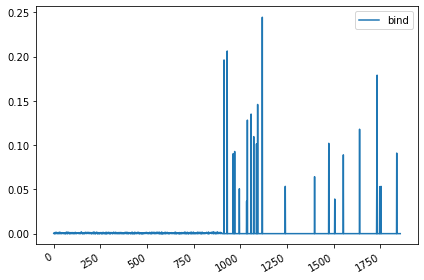

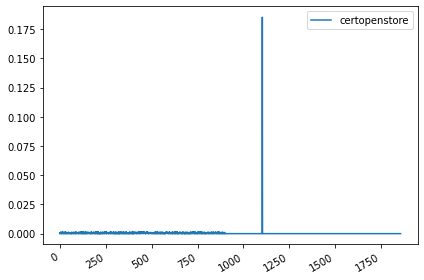

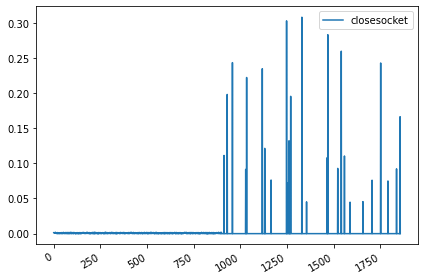

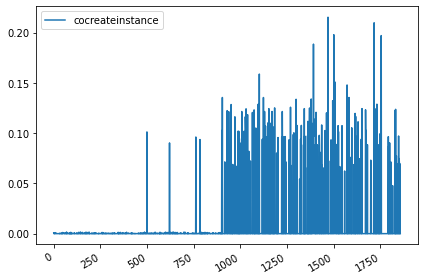

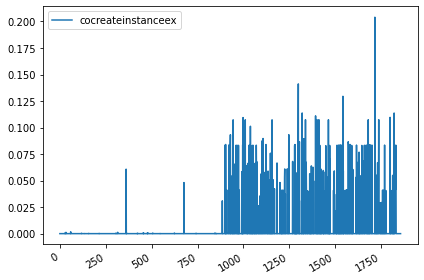

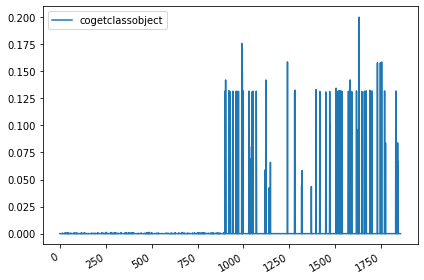

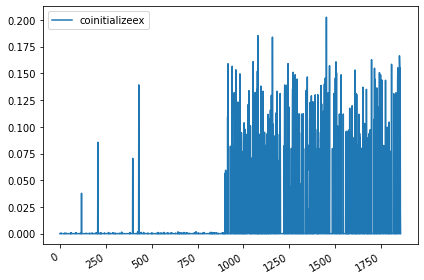

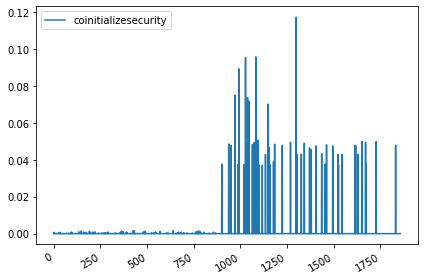

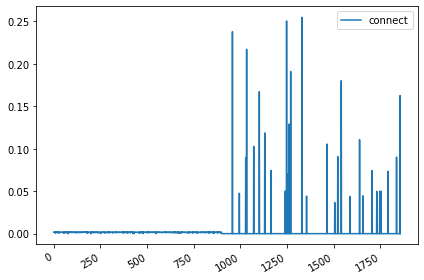

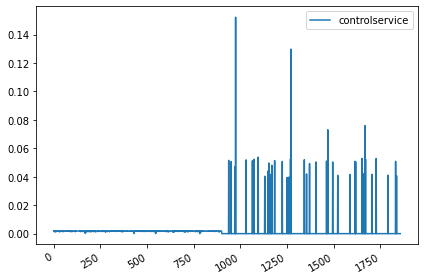

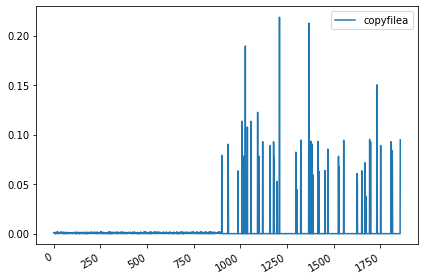

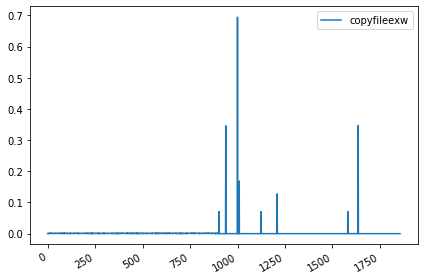

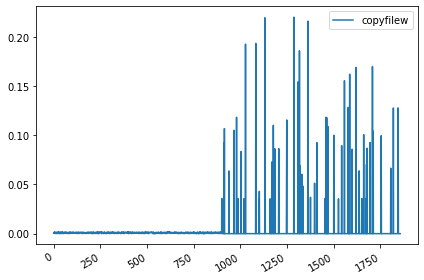

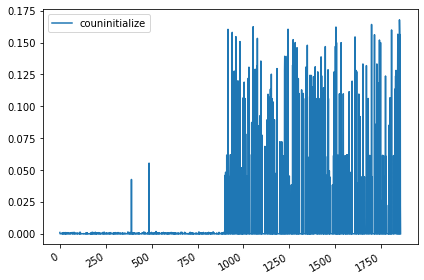

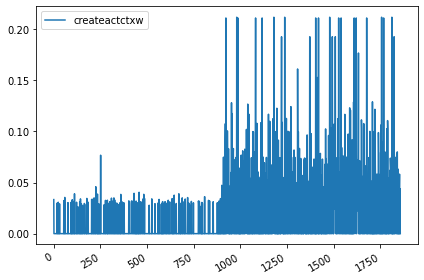

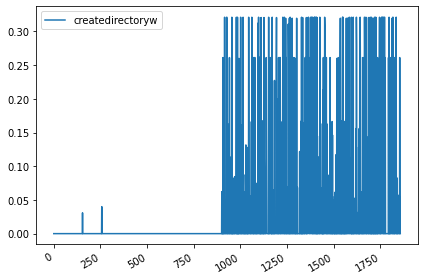

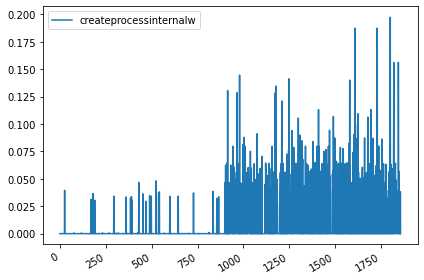

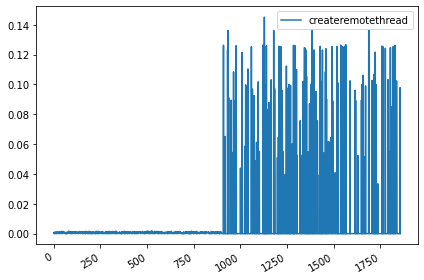

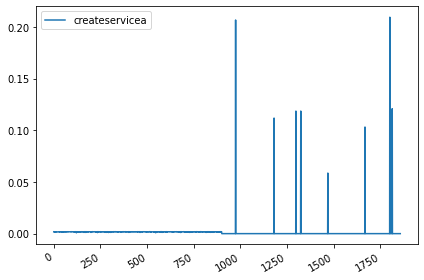

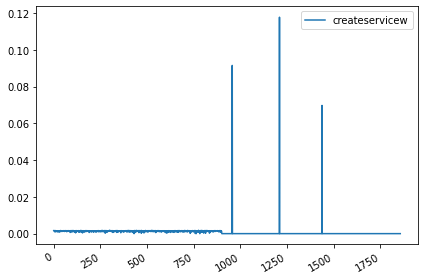

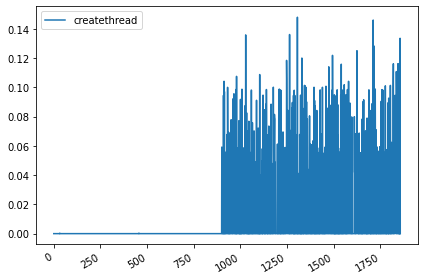

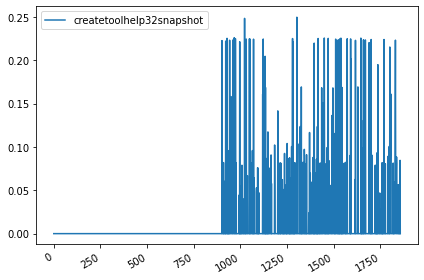

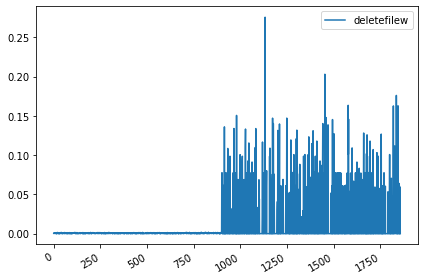

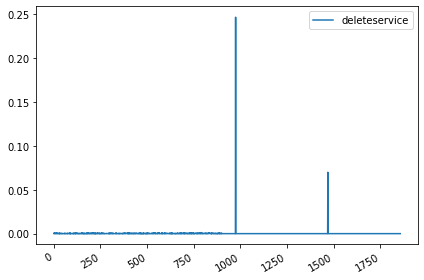

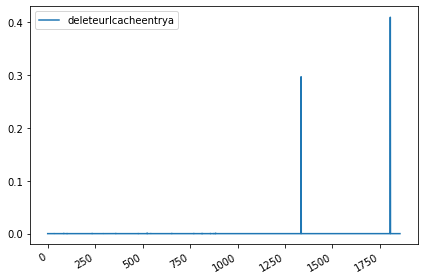

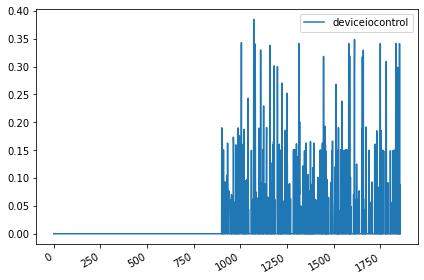

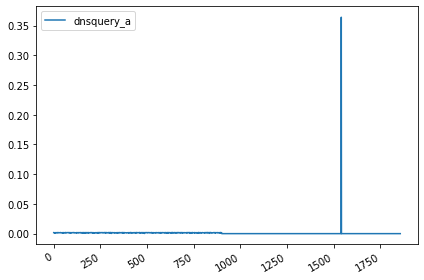

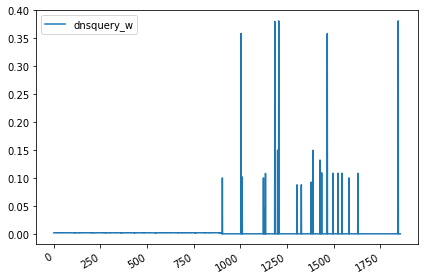

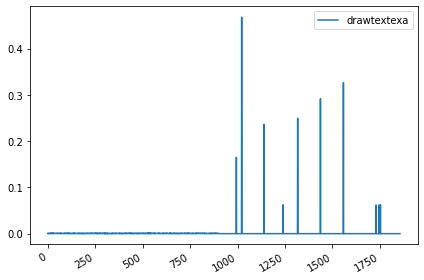

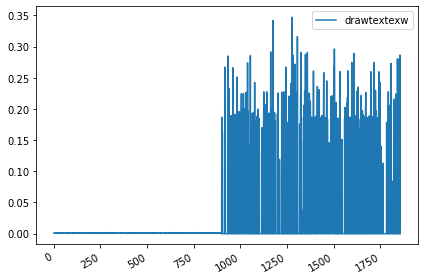

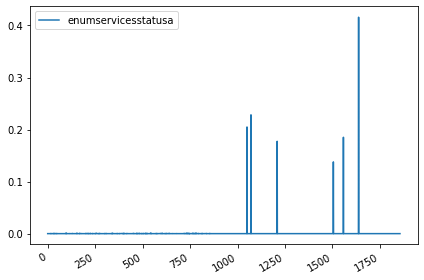

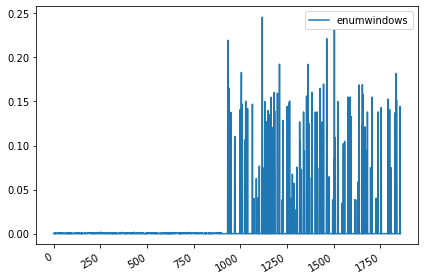

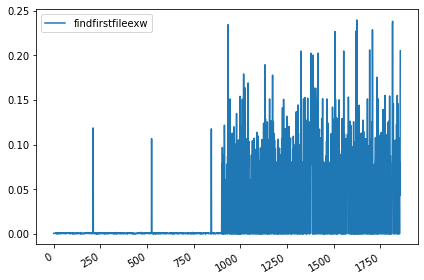

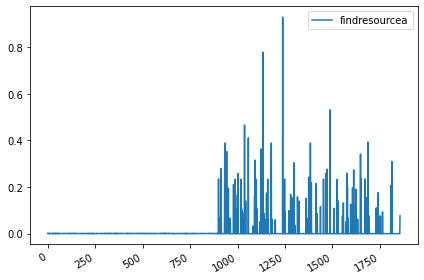

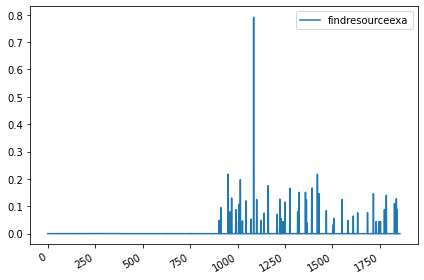

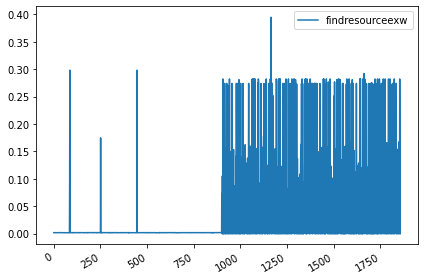

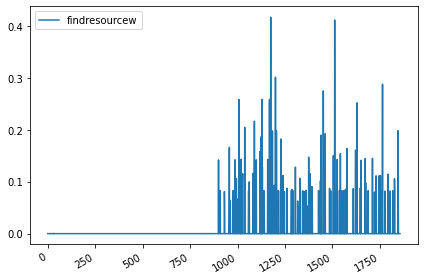

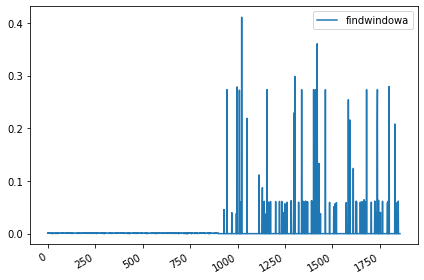

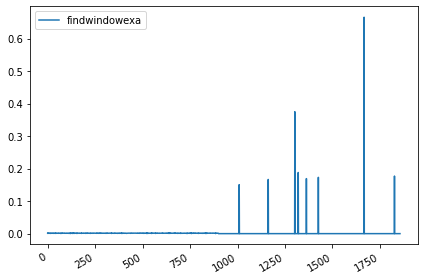

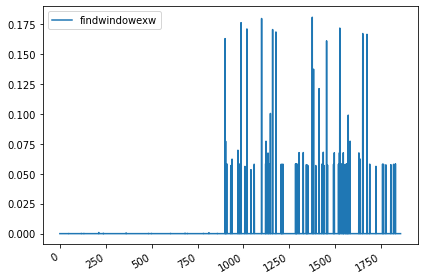

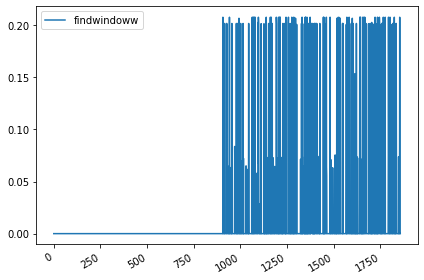

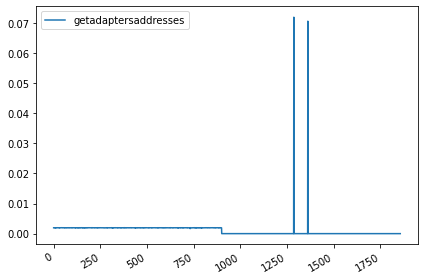

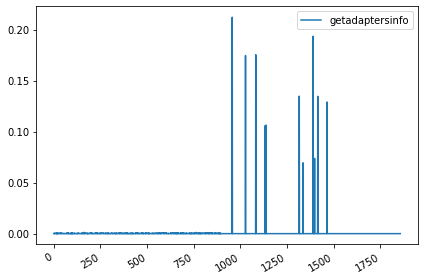

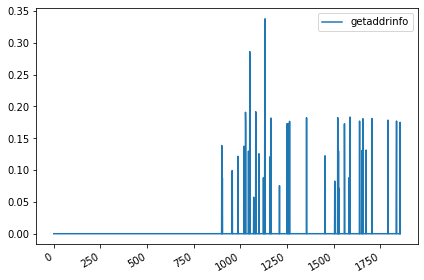

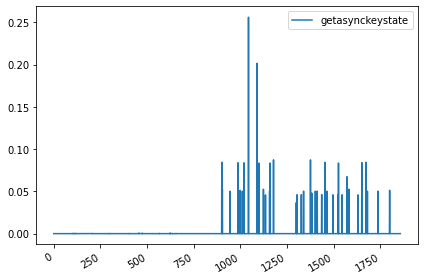

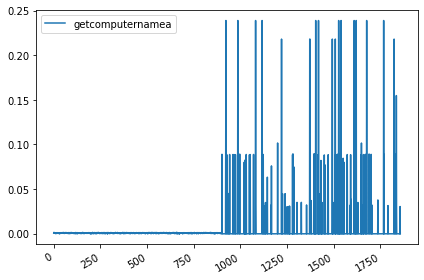

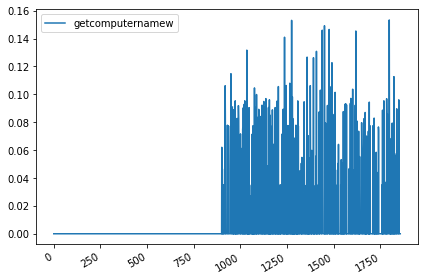

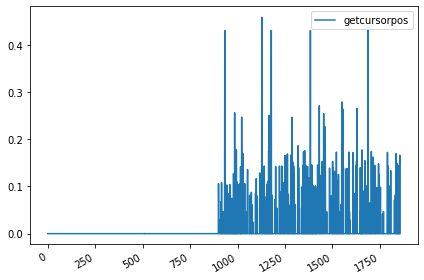

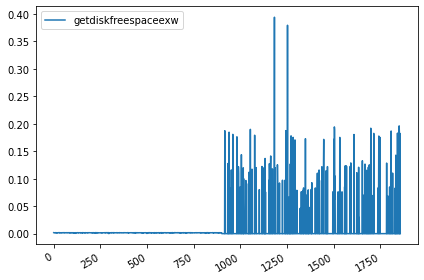

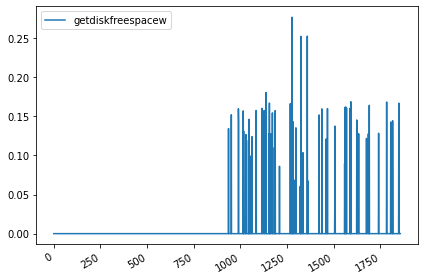

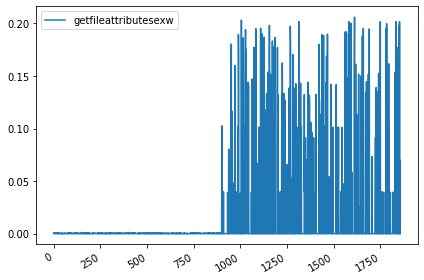

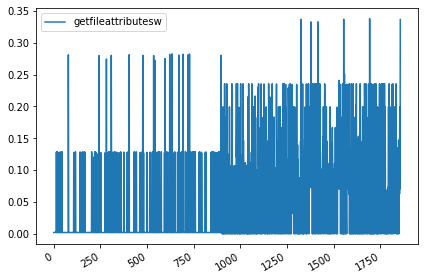

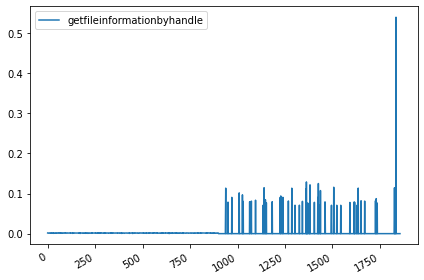

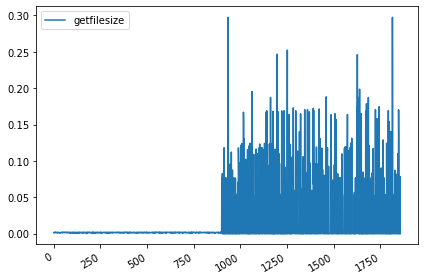

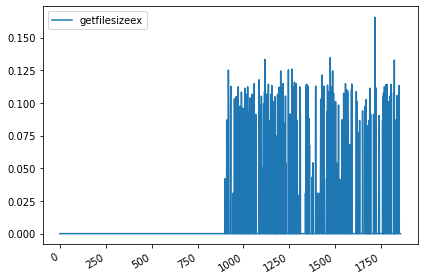

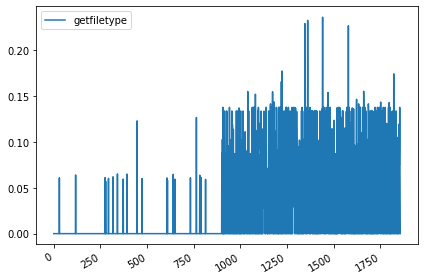

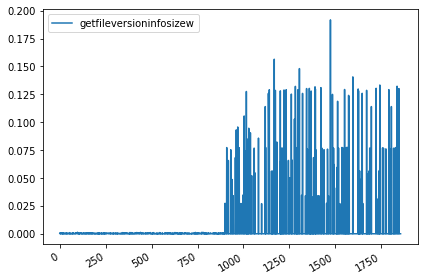

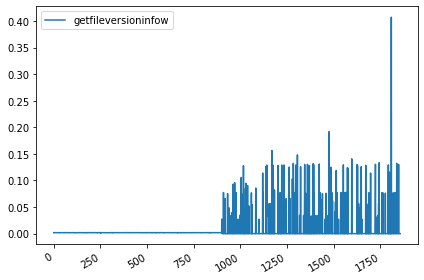

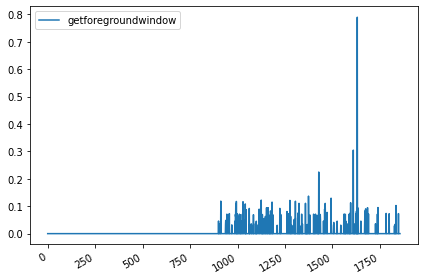

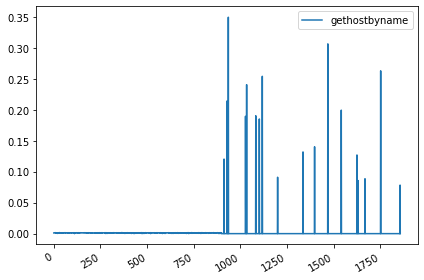

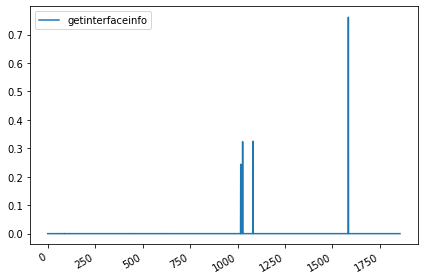

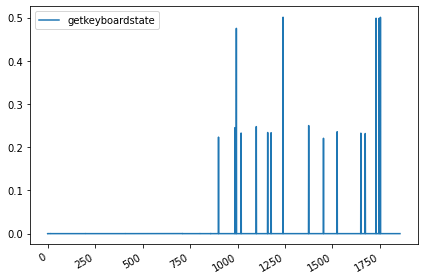

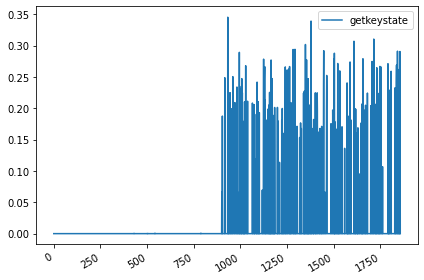

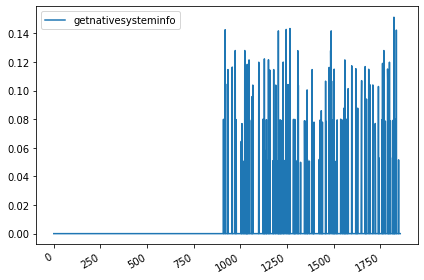

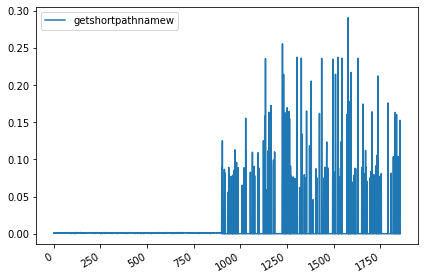

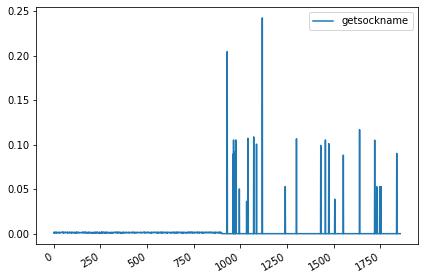

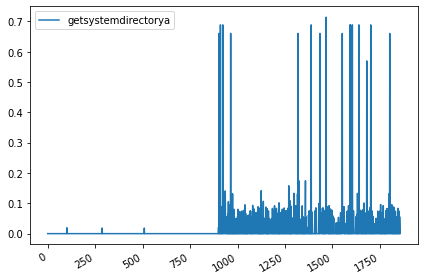

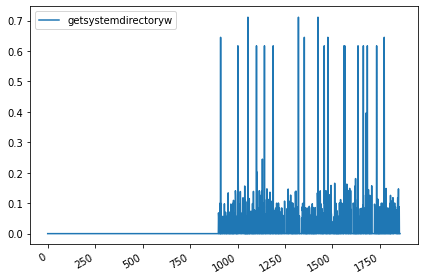

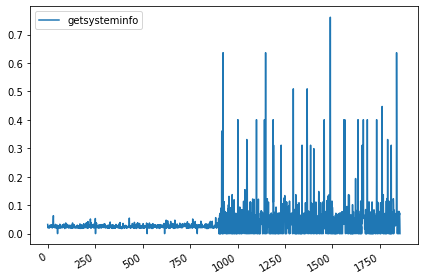

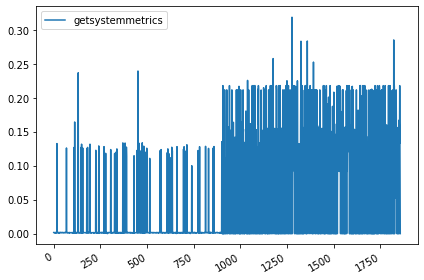

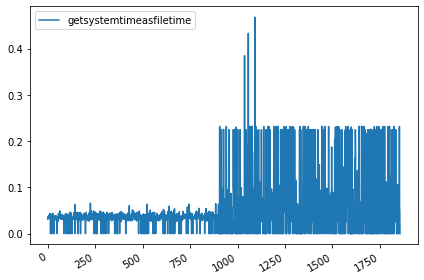

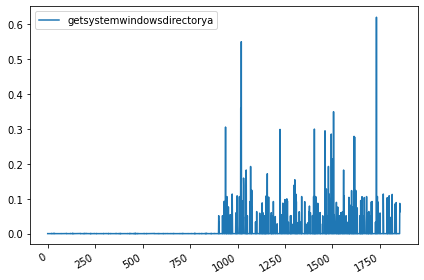

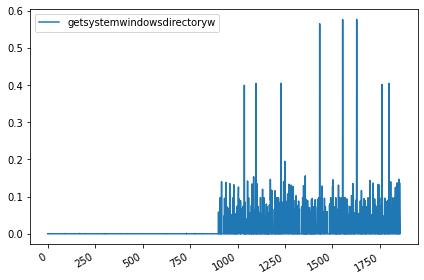

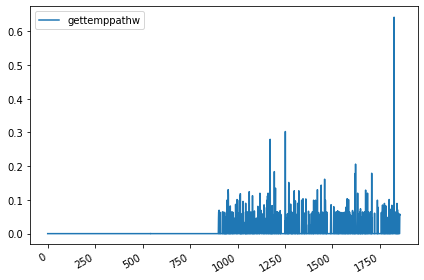

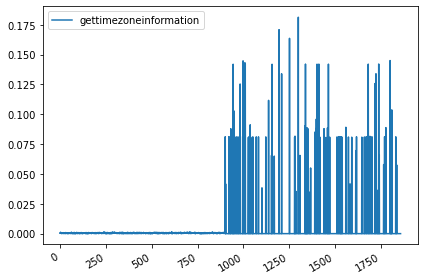

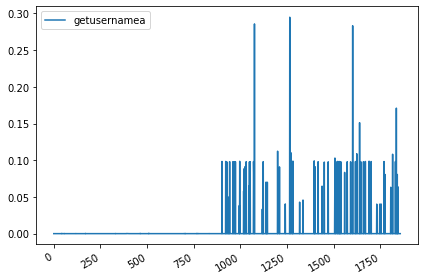

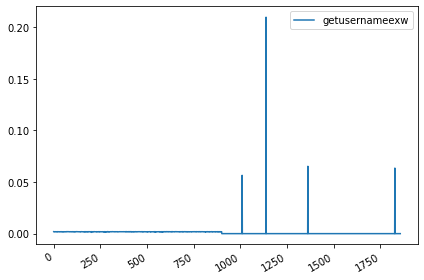

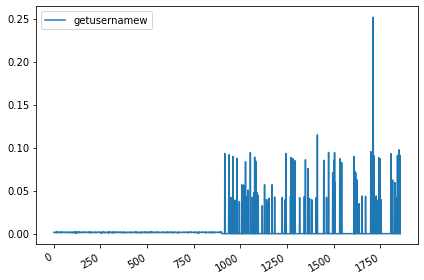

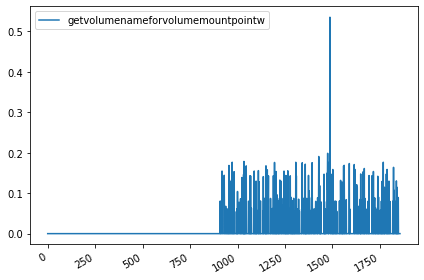

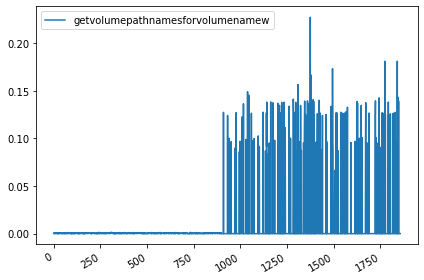

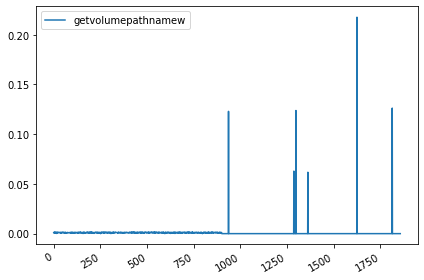

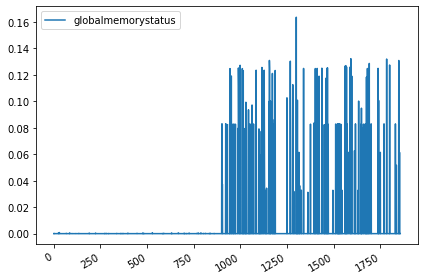

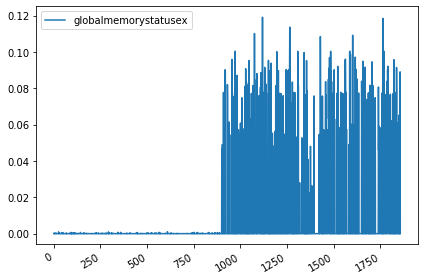

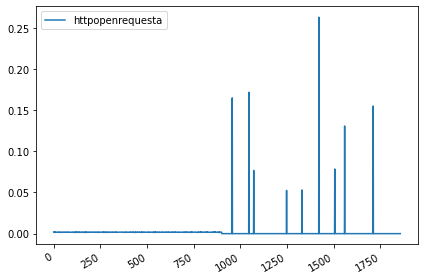

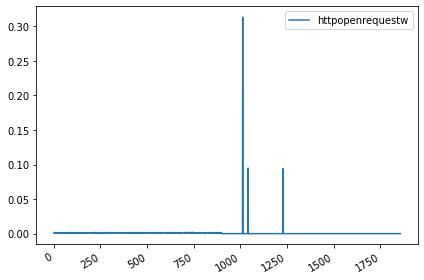

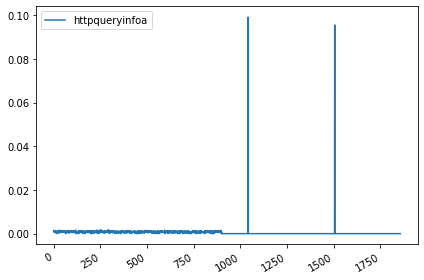

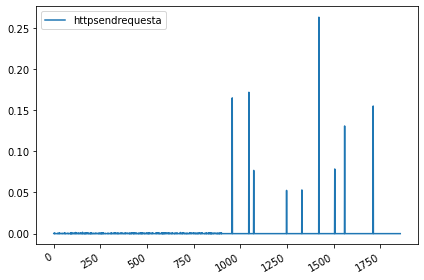

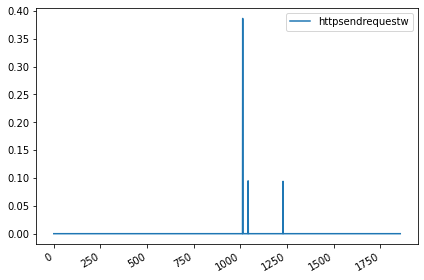

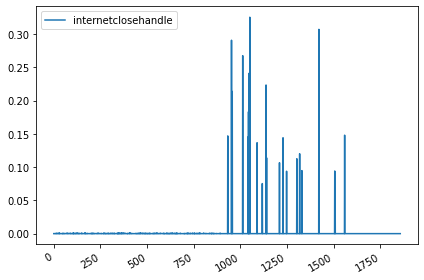

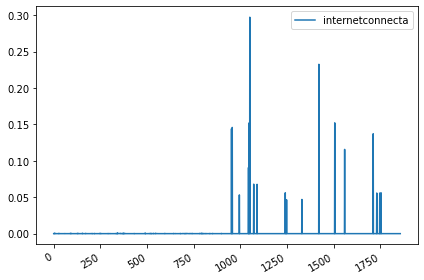

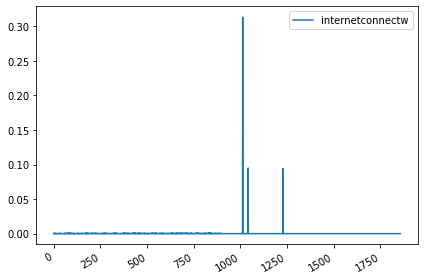

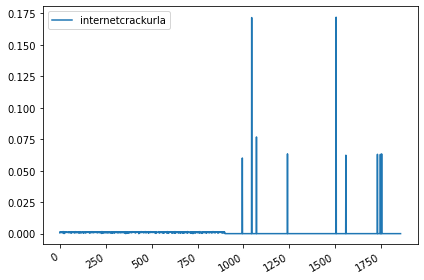

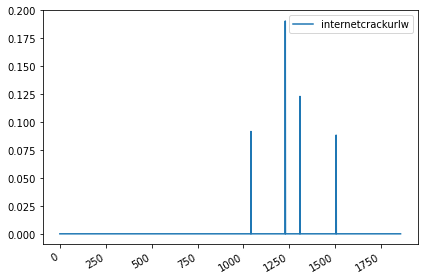

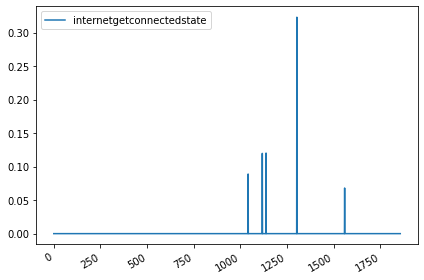

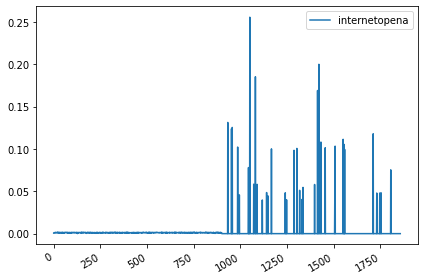

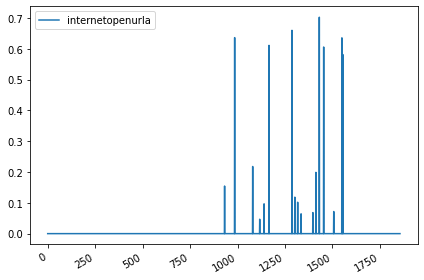

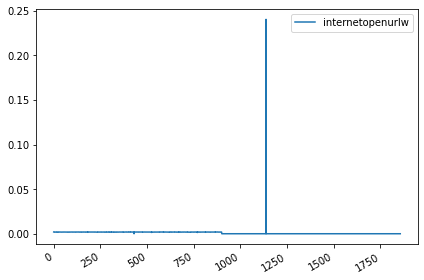

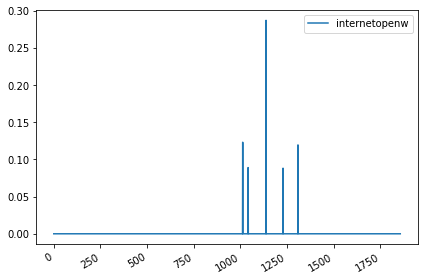

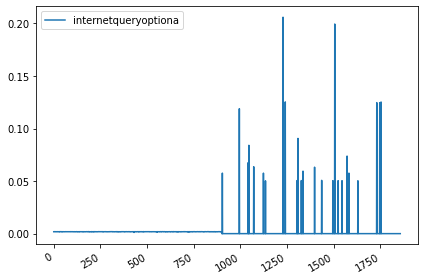

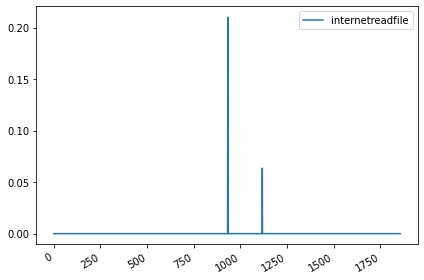

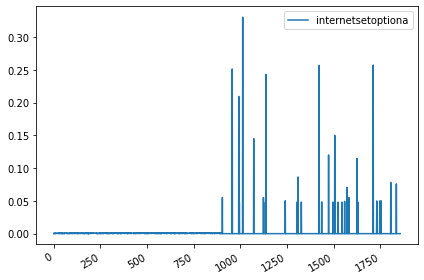

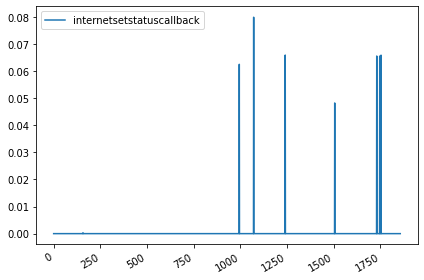

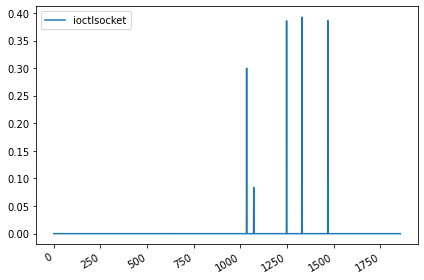

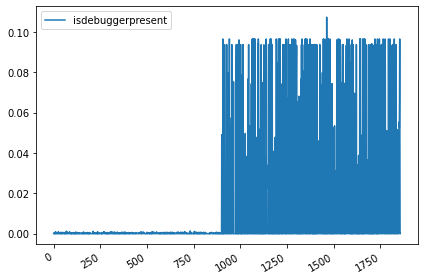

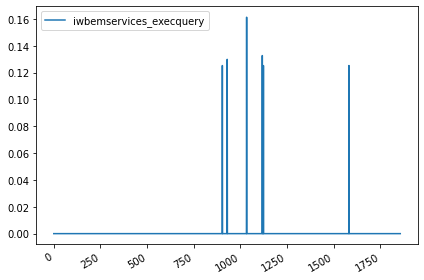

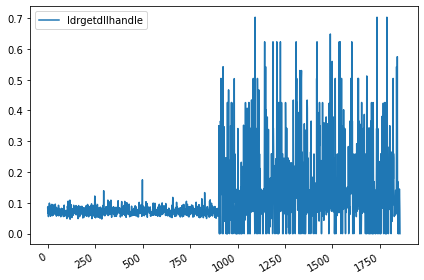

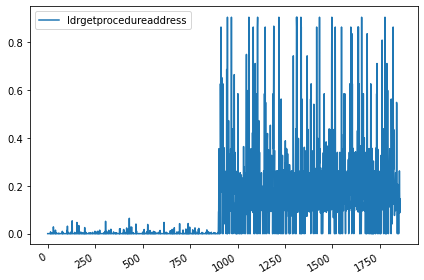

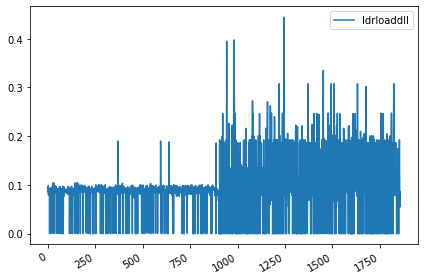

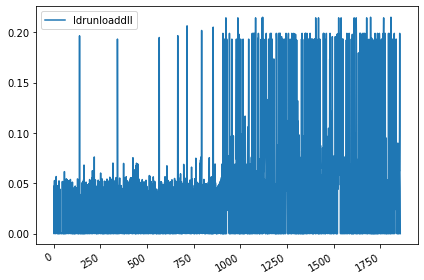

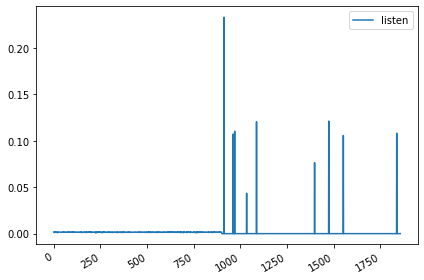

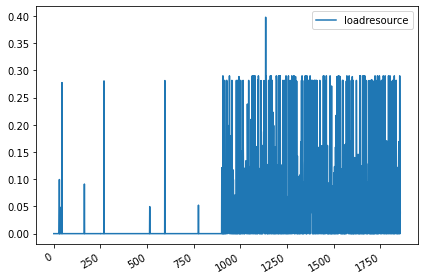

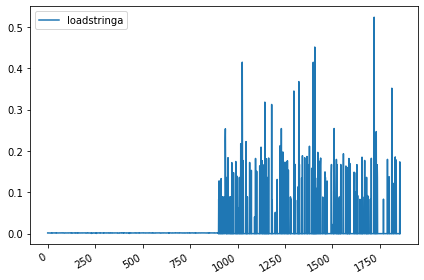

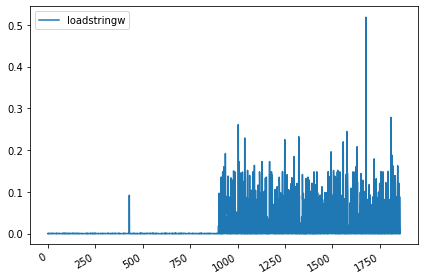

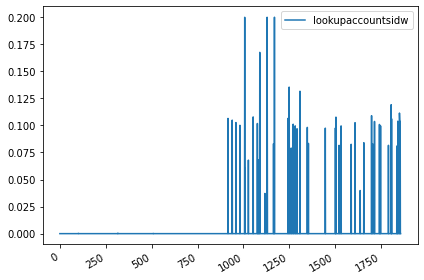

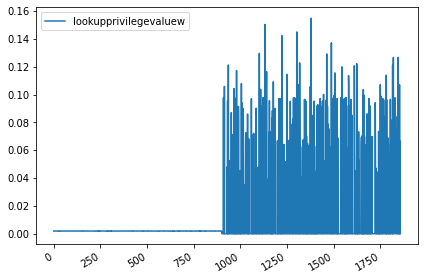

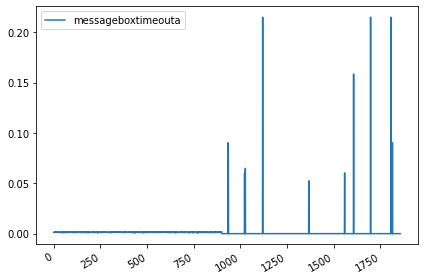

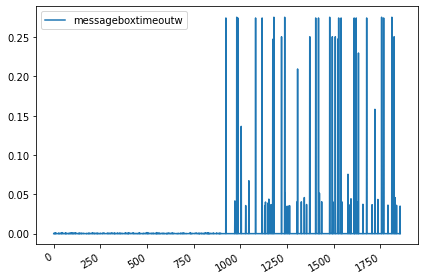

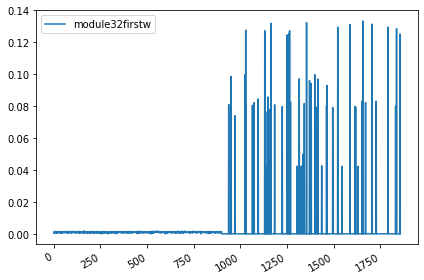

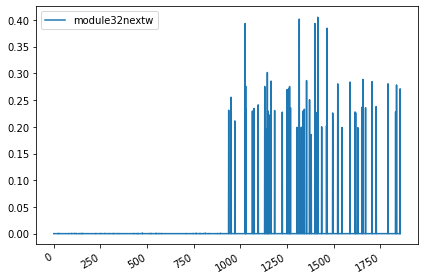

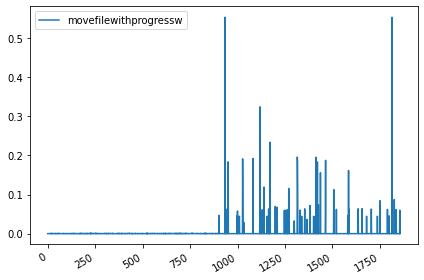

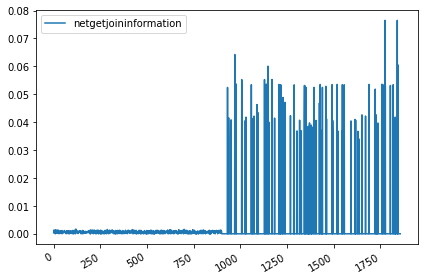

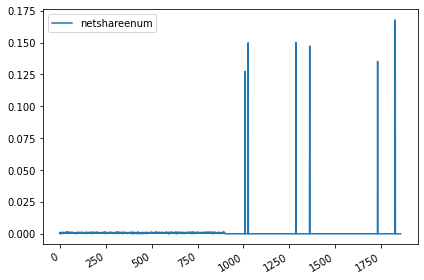

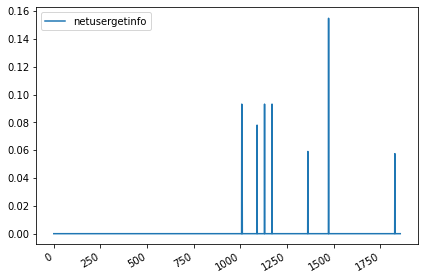

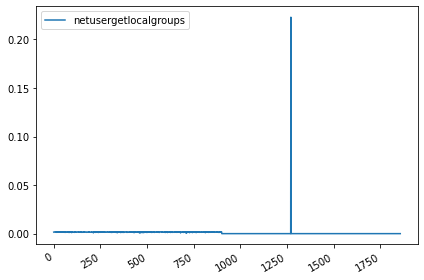

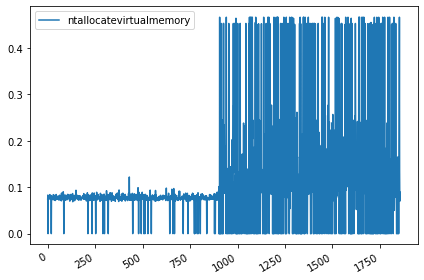

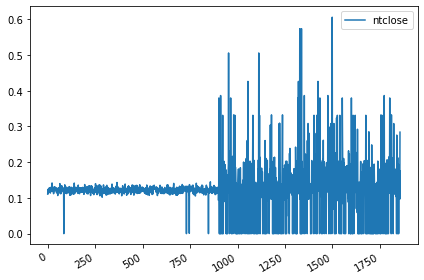

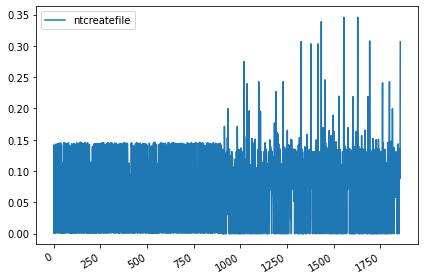

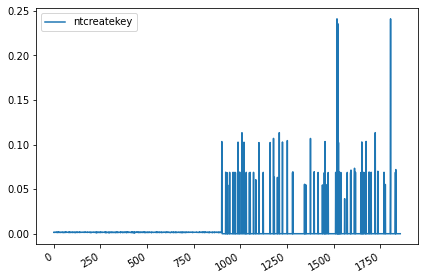

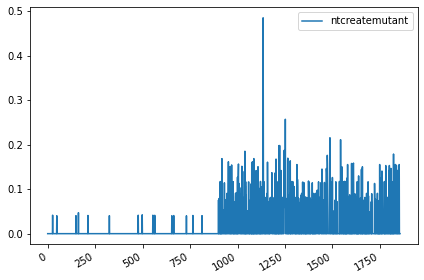

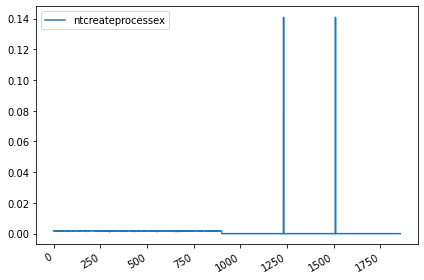

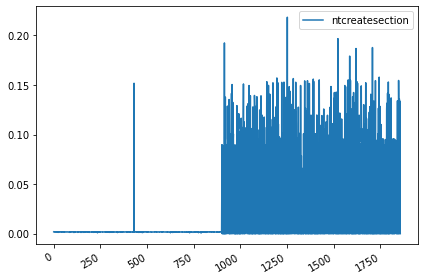

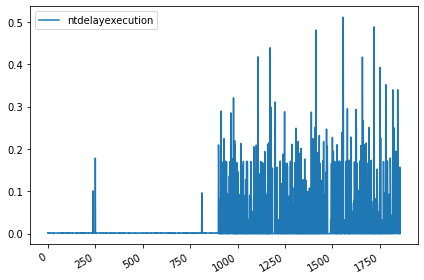

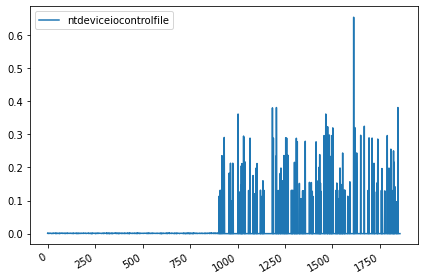

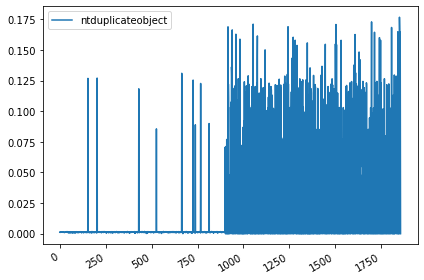

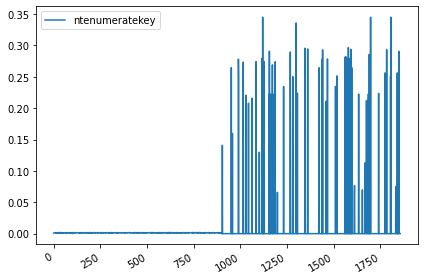

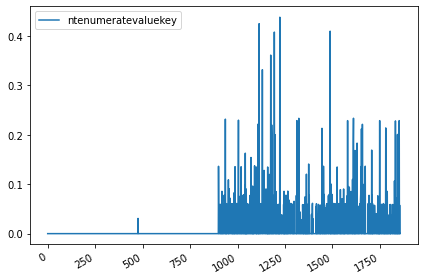

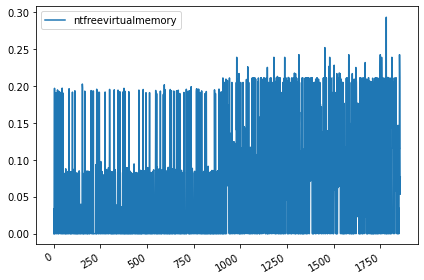

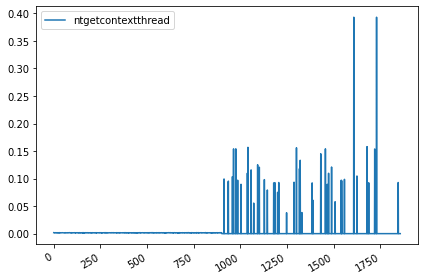

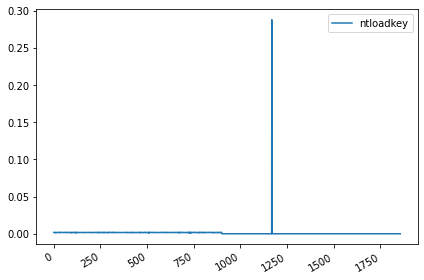

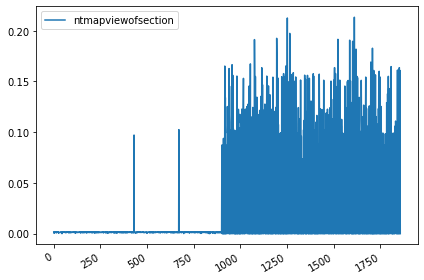

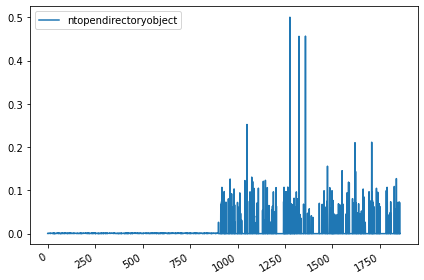

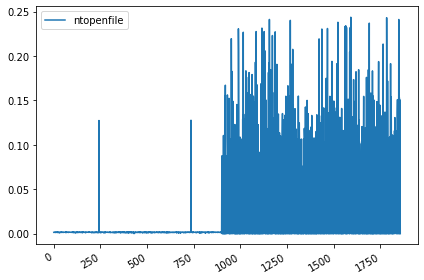

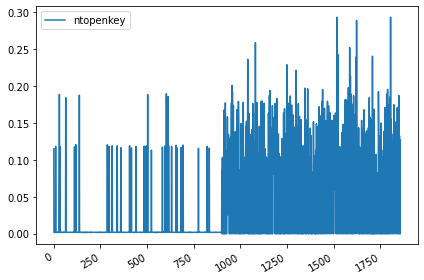

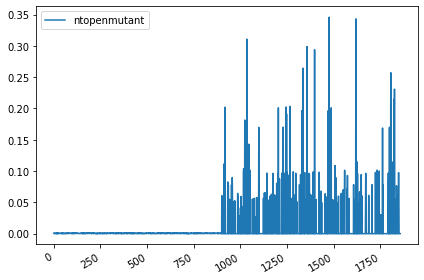

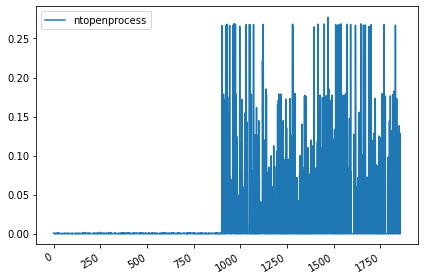

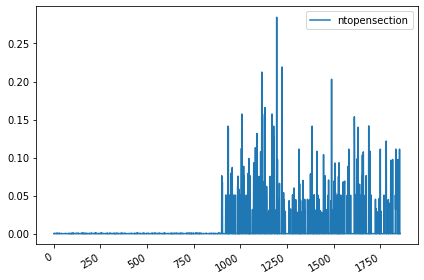

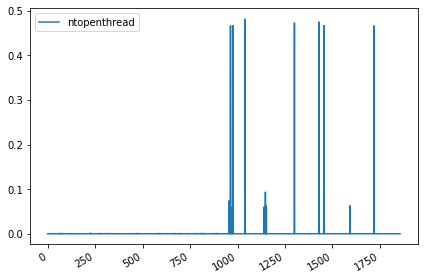

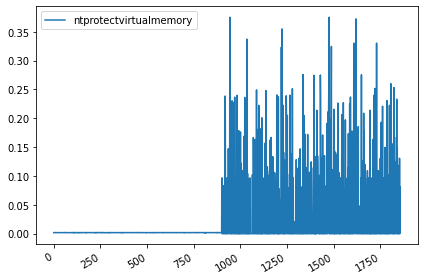

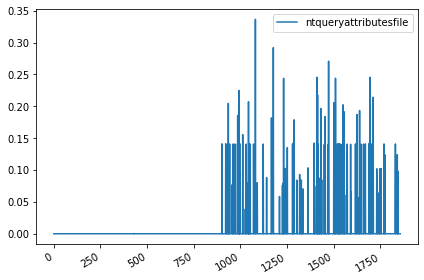

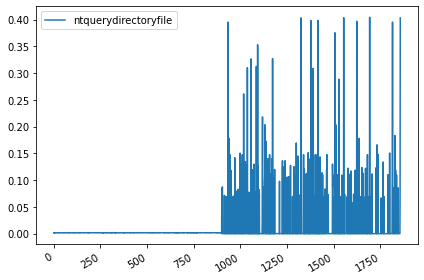

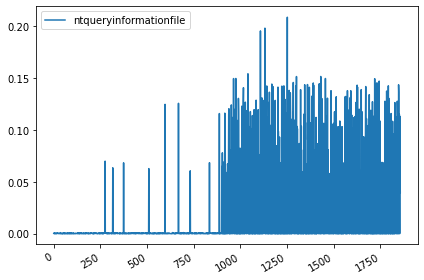

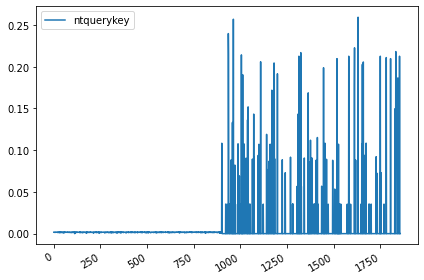

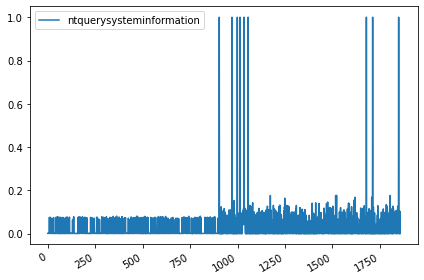

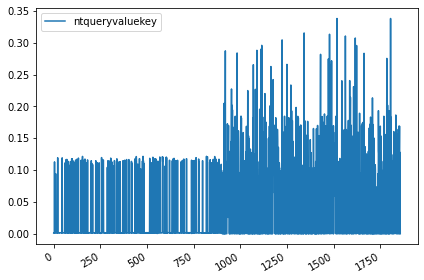

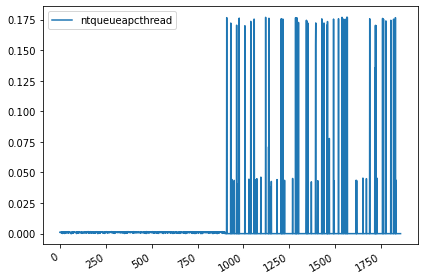

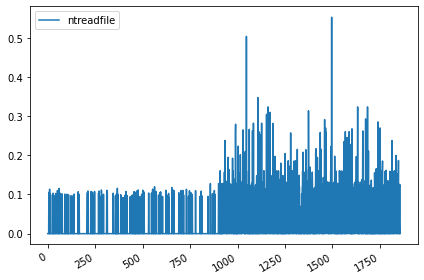

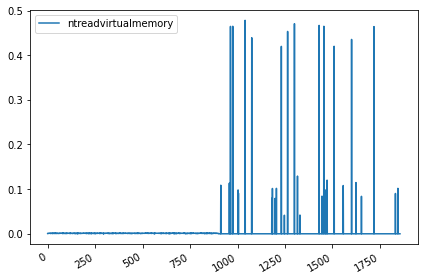

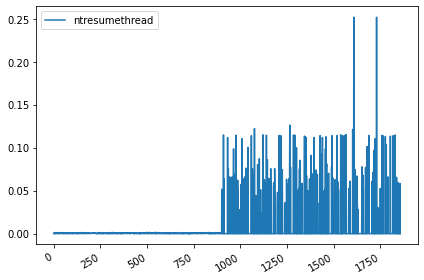

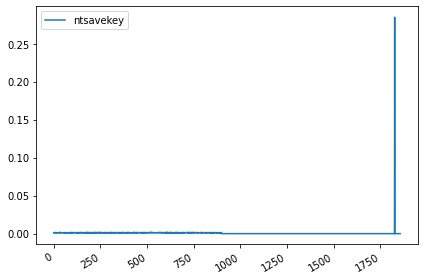

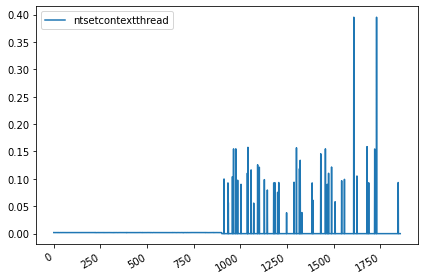

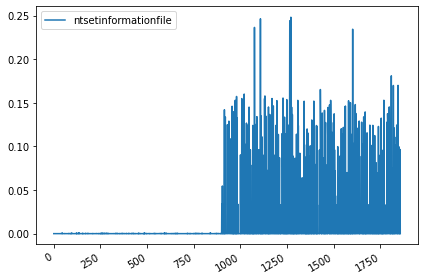

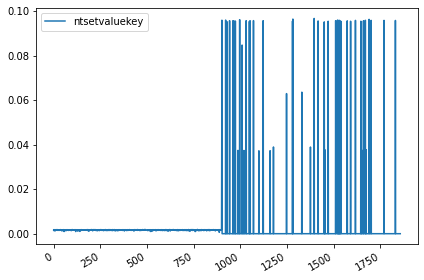

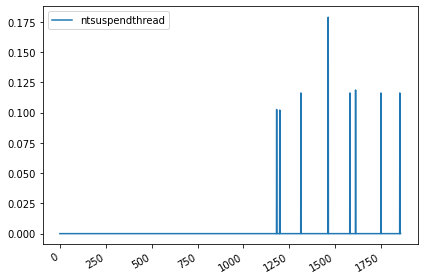

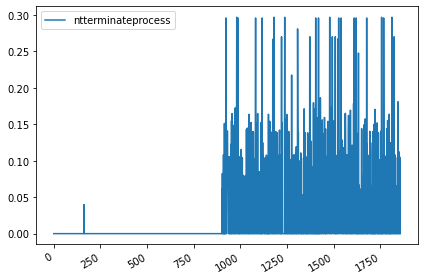

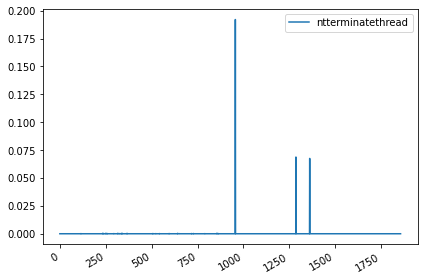

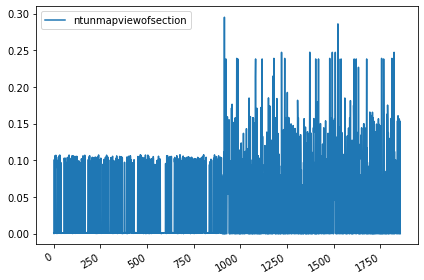

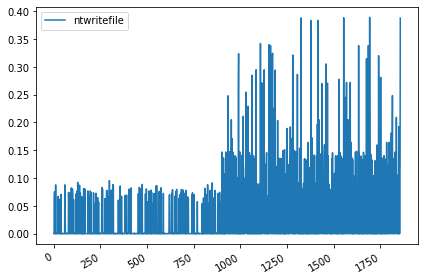

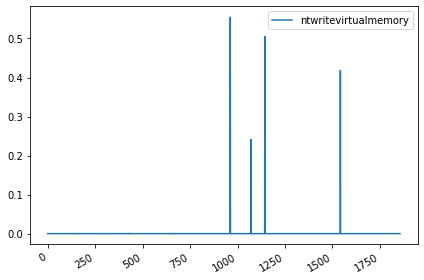

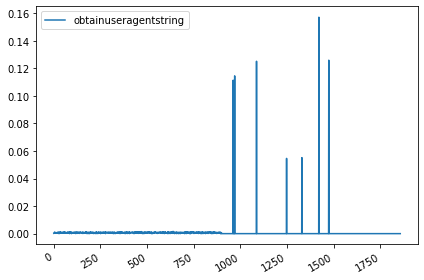

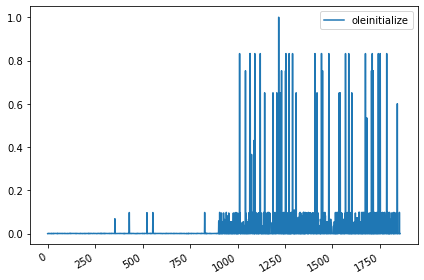

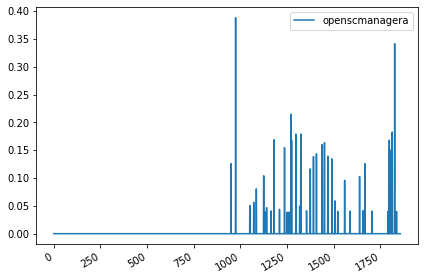

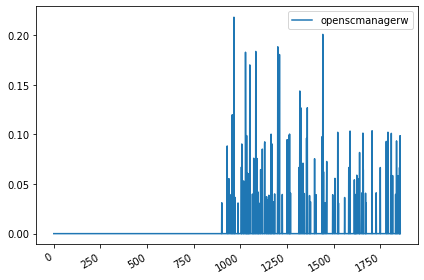

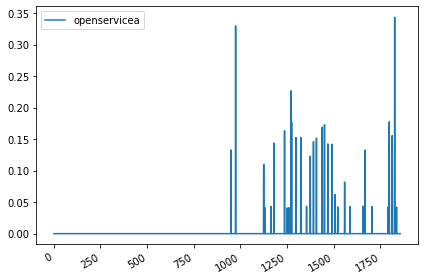

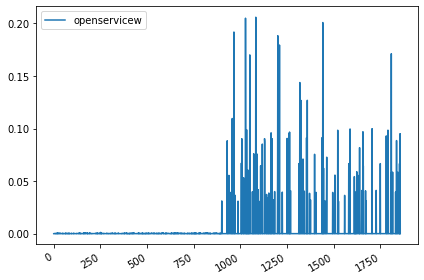

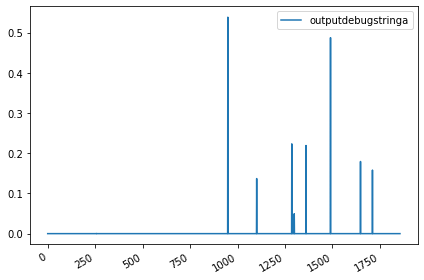

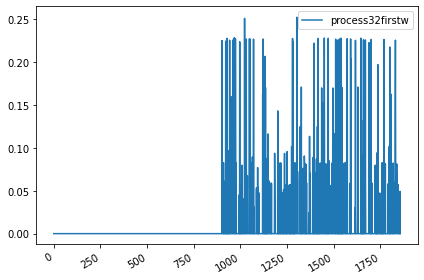

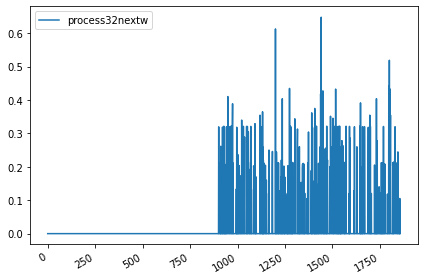

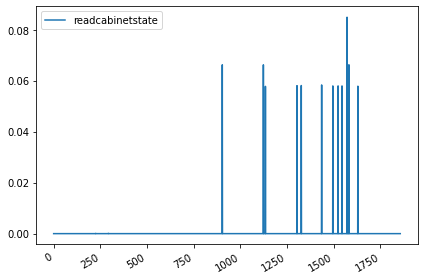

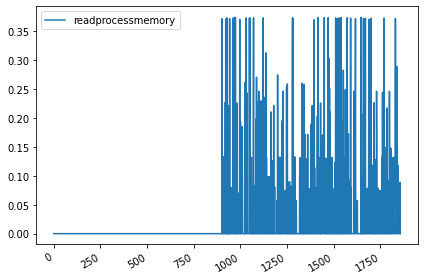

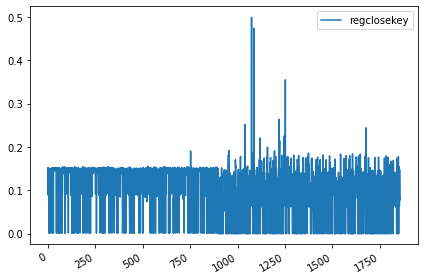

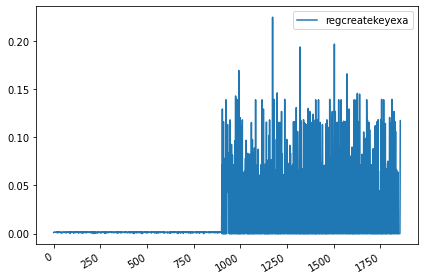

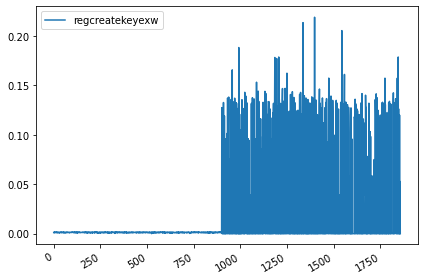

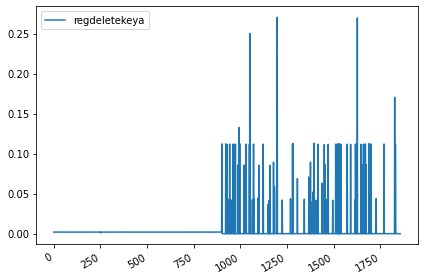

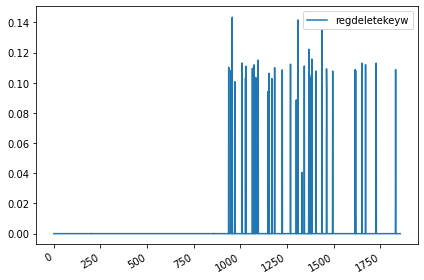

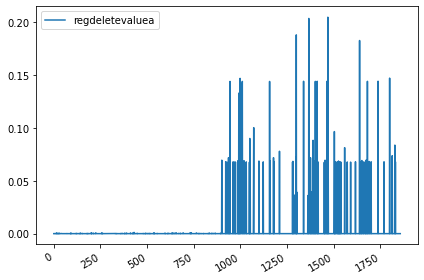

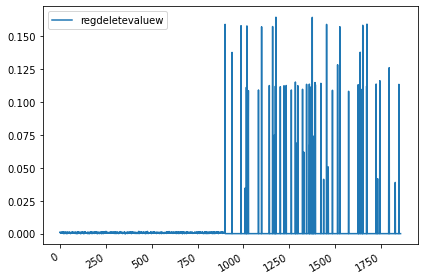

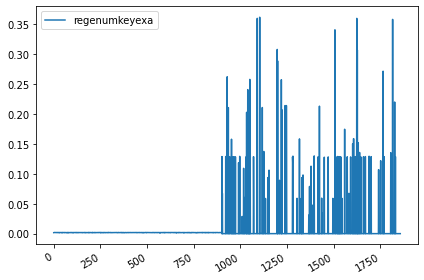

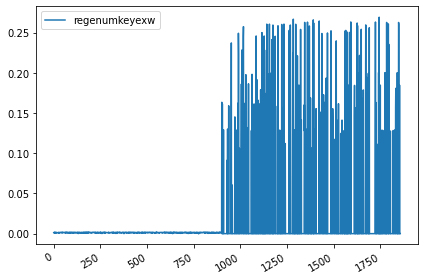

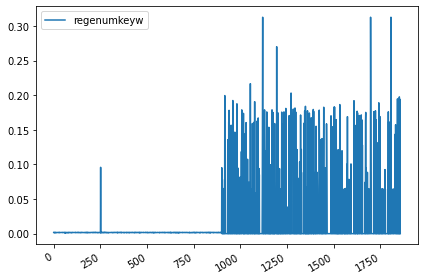

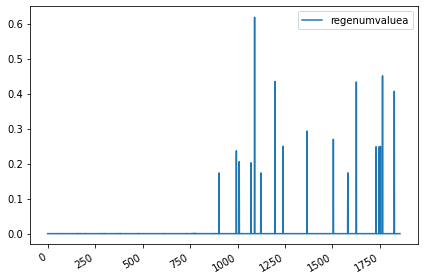

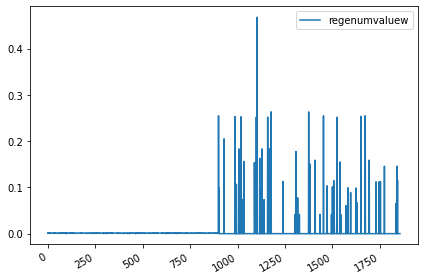

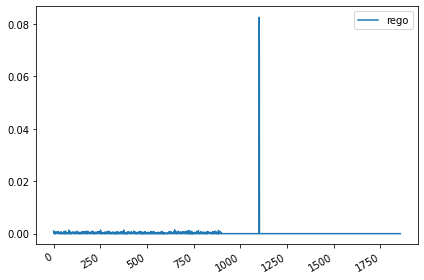

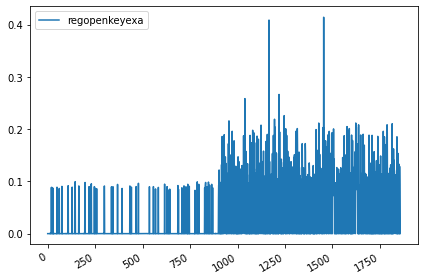

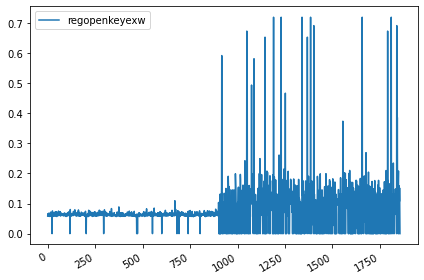

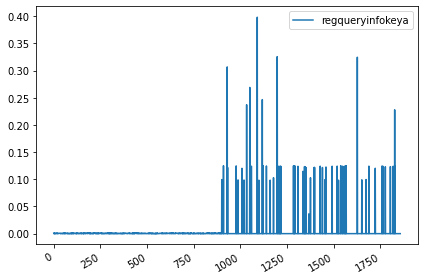

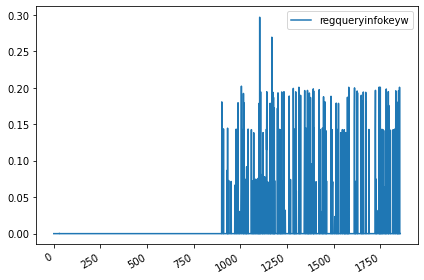

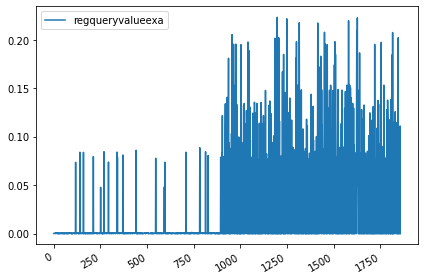

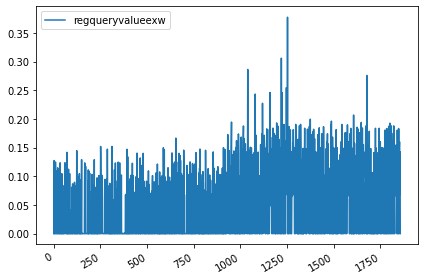

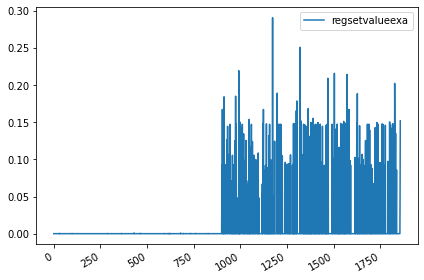

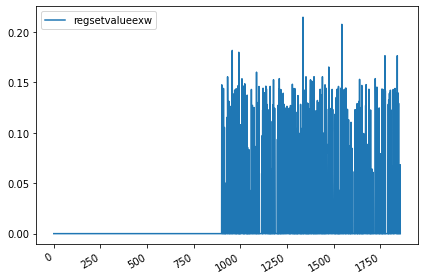

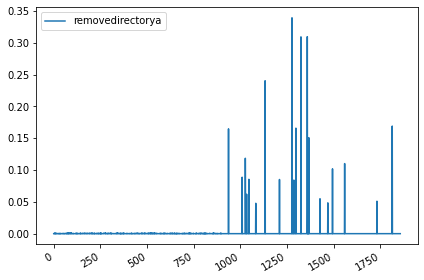

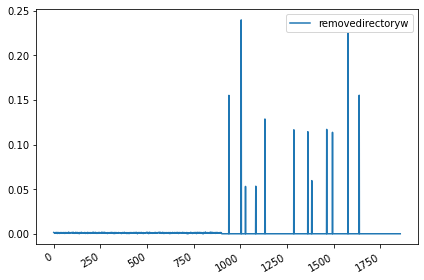

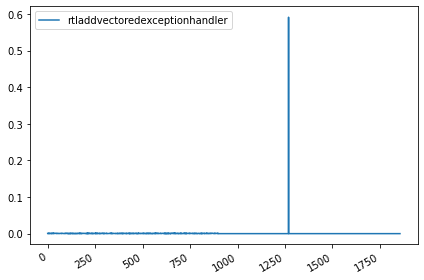

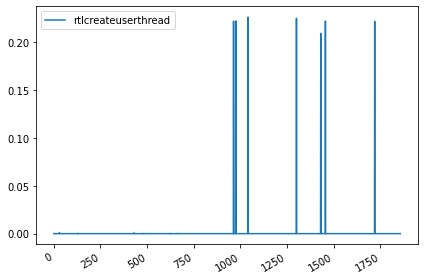

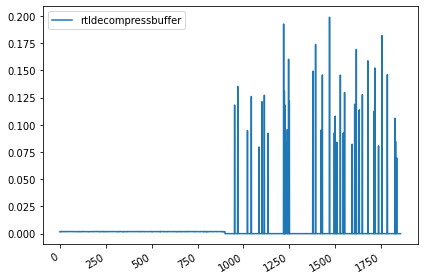

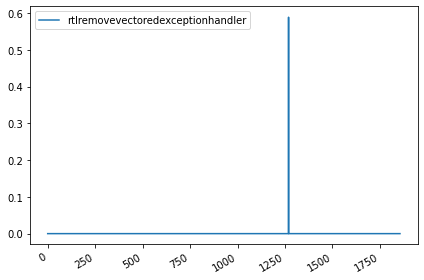

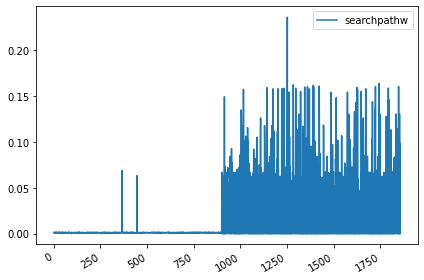

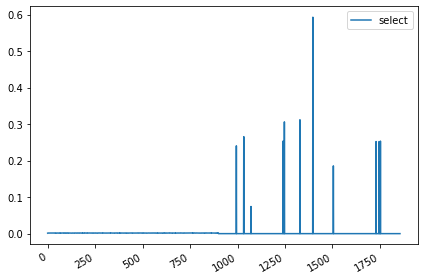

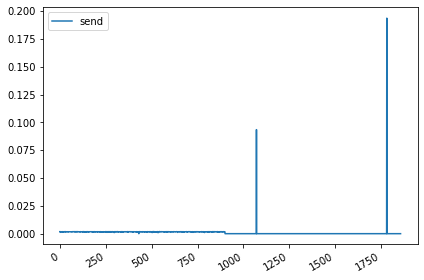

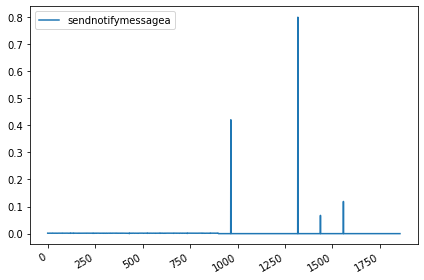

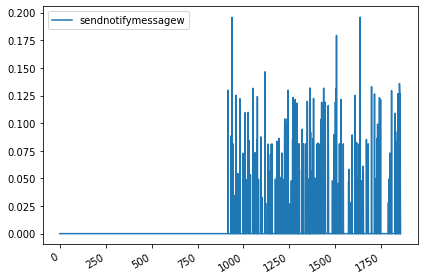

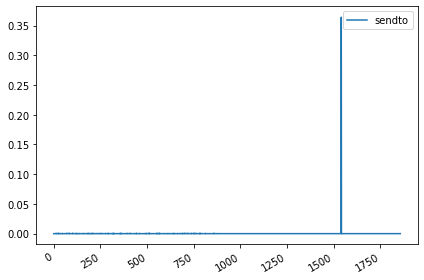

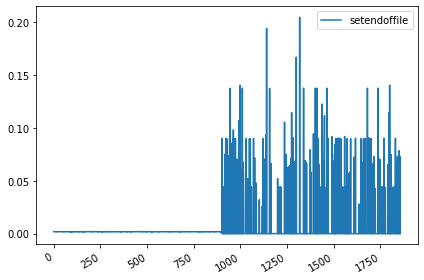

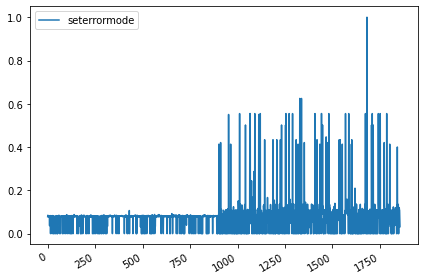

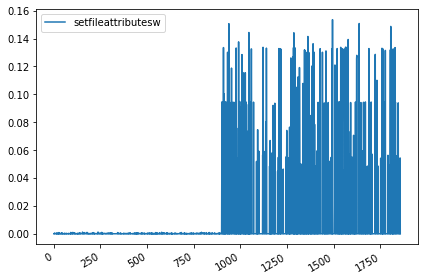

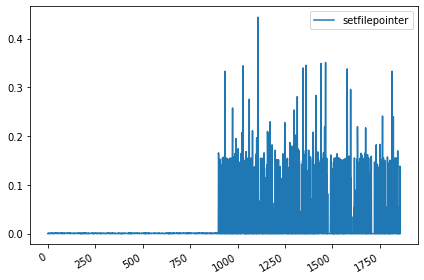

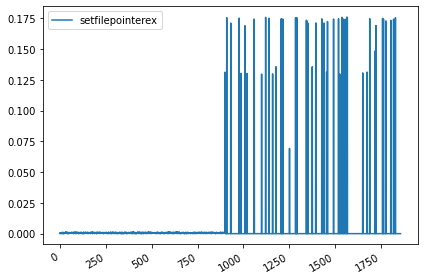

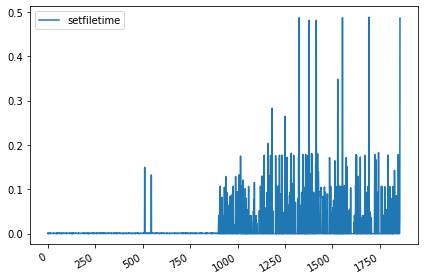

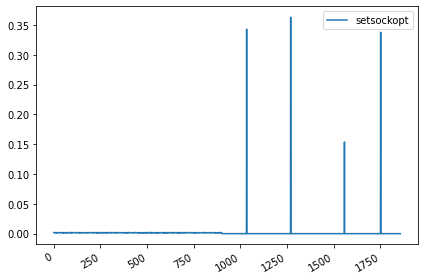

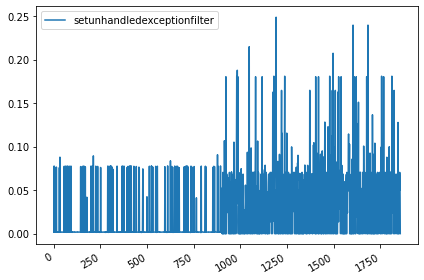

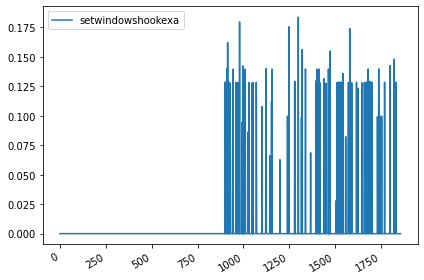

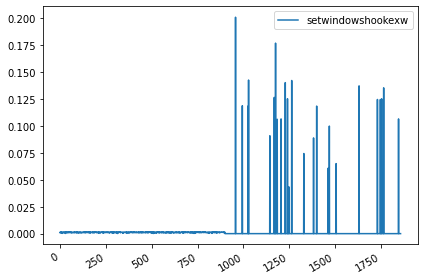

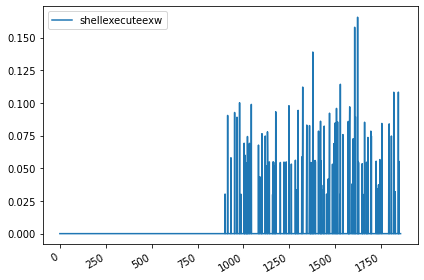

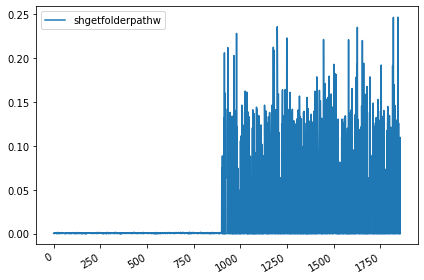

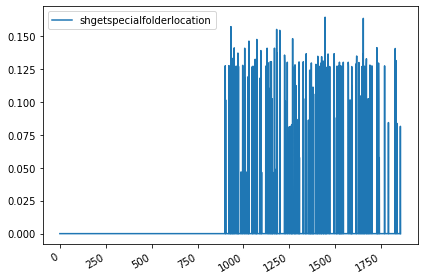

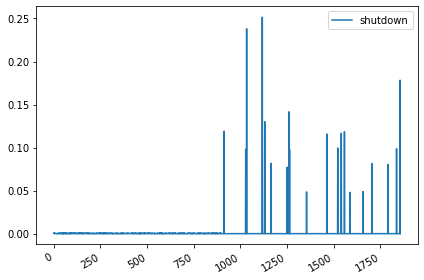

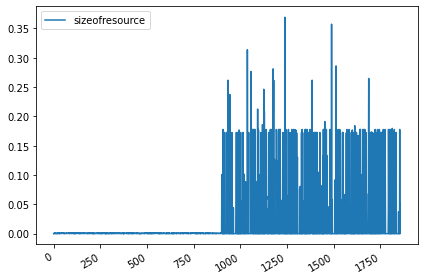

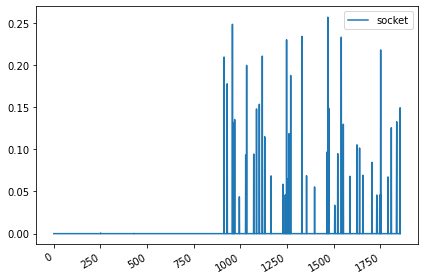

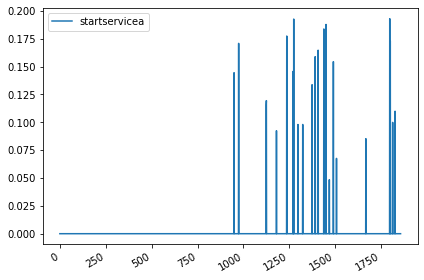

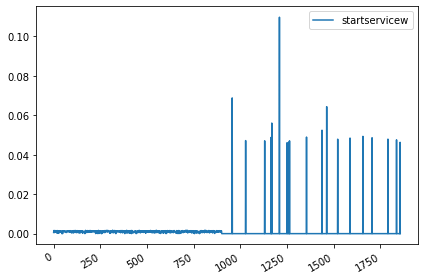

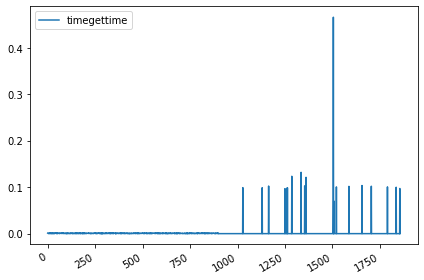

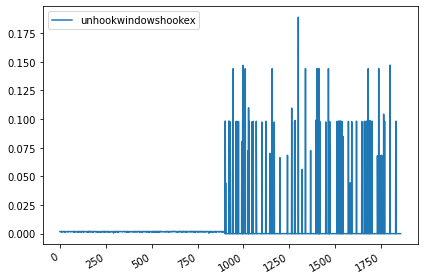

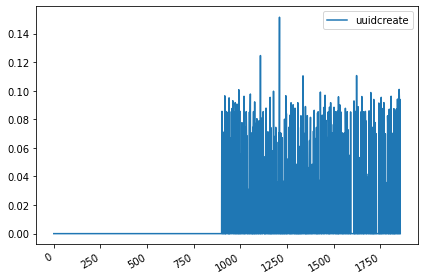

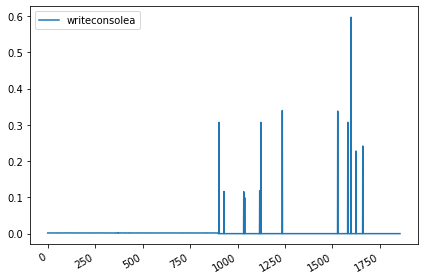

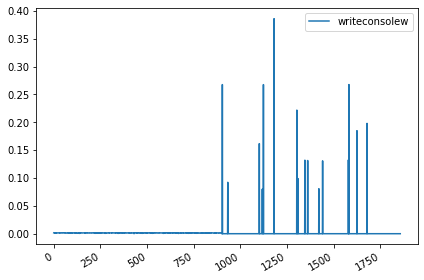

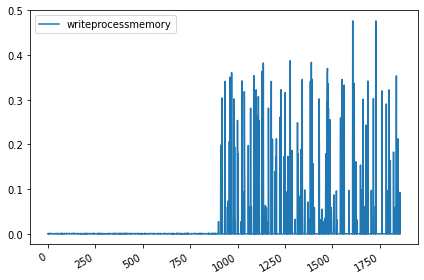

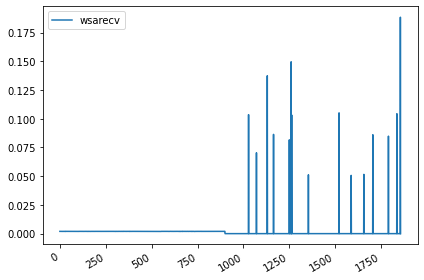

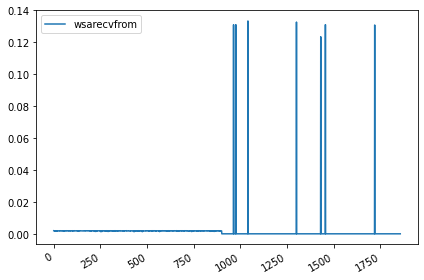

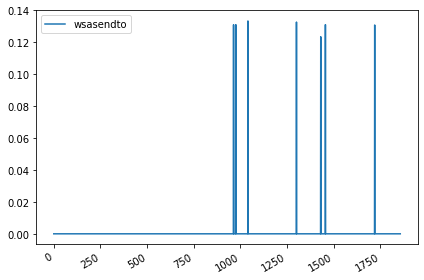

In [101]:
for i in range(1,240):
  twenty_columns = data.iloc[:,i:i+1]
  twenty_columns.plot(subplots=True)
  plt.tight_layout()
  plt.show()